In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn import datasets

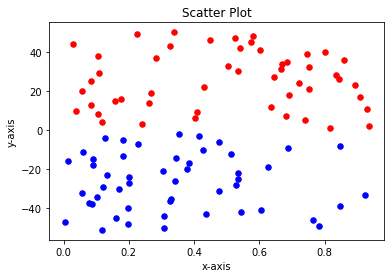

In [2]:
num_points = 50
#np.random.randn
x1 = np.arange(1,51)
y1 = np.random.random(50)

x2 = np.arange(-51,-1)
y2 = np.random.random(50)

plt.scatter(y1, x1, color='r', s=30)
plt.scatter(y2, x2, color='b', s=30)
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.title('Scatter Plot')
plt.show()

In [10]:
class Perceptron(object):             
  def __init__(self, X_train, Y_train, lr=0.1, epochs=100, epsilon=1e-5):
    # add one for bias
    self.n, _ = X_train.shape
    self.X_train = np.c_[np.ones(self.n), X_train]
    _, self.d = self.X_train.shape
    self.W = np.ones([self.d,1])
    self.epochs, self.lr, self.epsilon = epochs, lr, epsilon
    self.y_true = Y_train

  def activation_fn(self, x):
    return 2*(x>0)-1

  def predict(self, x):
    z = x.dot(self.W)
    a = self.activation_fn(z)
    return a   

  def seq_fit(self, verbose=False, plot=False):
    """
    Sequential Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      if np.all([np.squeeze(self.predict(self.X_train)) == np.squeeze(self.y_true)]):
        break
      for i in range(self.n):
        y_pred = self.predict(self.X_train[i])
        if y_pred != self.y_true[i]:
          self.W = self.W + self.y_true[i] * self.X_train[i].reshape([self.d,1])
      error_list.append(self.error())

      

      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)

    return self.W, error_list, epoch+1

  def batch_fit(self, verbose=False, plot=False):
    """
    Batch Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)] 
                                          * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break
    
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
        
    return self.W, error_list, epoch+1

  def new_batch_fit(self, verbose=False, plot=False):
    """
    Batch Perceptron algorithm.
    """
    error_list = []
    for epoch in range(self.epochs):
      y_pred = self.predict(self.X_train)
      if np.any([np.squeeze(y_pred) != np.squeeze(self.y_true)]):
        update = np.sum(self.y_true[np.squeeze(y_pred) != np.squeeze(self.y_true)] 
                                          * self.X_train[np.squeeze(y_pred) != np.squeeze(self.y_true)], axis=0).reshape([self.d,1])
        self.W += self.lr * update
        err = self.error()
        error_list.append(err)
      else:
        break
    
      if verbose:
        print("Error at epoch {}: {}".format(epoch, err))
      if plot:
        print("epochs {}: the weight:{} \n".format(epoch, self.W))
        self.plot(self.W[1], self.W[2], self.W[0], epoch)
        
    return self.W, error_list, epoch+1

  def error(self, X_test=None, y_test=None):
    """
    Used to calculate the residual sum of squares (RSS) error.
    If X_test and y_test are not given, returns the training RSS,
    otherwise test RSS.
    """
    if X_test is None:
      diff = self.y_true-self.predict(self.X_train)
    else:
      diff = y_test-self.predict(X_test)
    return (diff.T@diff)[0,0]

  def plot(self, a, b, bias, epoch):
    y = self.y_true.reshape(len(self.y_true),)
    plt.plot(self.X_train[:, 1][y == -1], self.X_train[:, 2][y == -1], 'ro')
    plt.plot(self.X_train[:, 1][y ==  1], self.X_train[:, 2][y ==  1], 'bo')

    xx = np.linspace(-1,11,5000)
    yy = (a*xx + bias)/(-1*b)
    plt.plot(xx, yy,'b')
    plt.title("epoch "+str(epoch))
    plt.xlim(np.min(self.X_train[:, 1])-1, np.max(self.X_train[:, 1])+1)
    plt.ylim(np.min(self.X_train[:, 2])-1, np.max(self.X_train[:, 2])+1)
    plt.show()


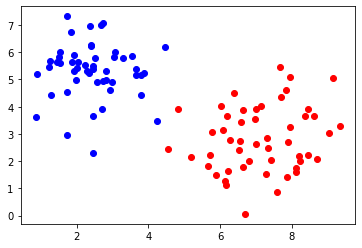

epochs 0: the weight:[[ -34.        ]
 [-251.52704927]
 [-104.05038224]] 



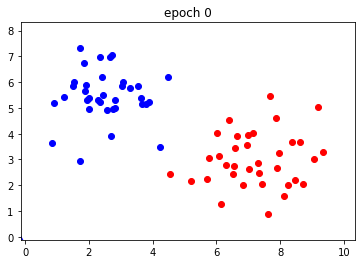

epochs 1: the weight:[[   1.        ]
 [-163.0151143 ]
 [  87.72121694]] 



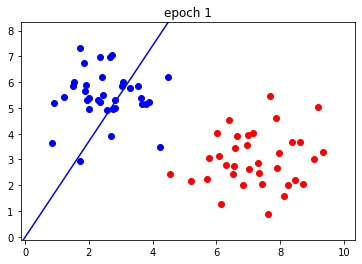

epochs 2: the weight:[[  13.        ]
 [-122.54691376]
 [ 146.77033898]] 



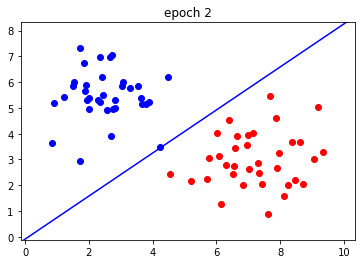

[140, 48, 0]


In [4]:
n = 100
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=123)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=10)
w, in_err, converge_iter = perceptron.batch_fit(plot=True)
print(in_err)

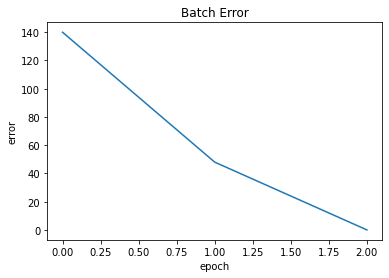

[140, 48, 0]


In [5]:
plt.plot(in_err)
plt.title("Batch Error")
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

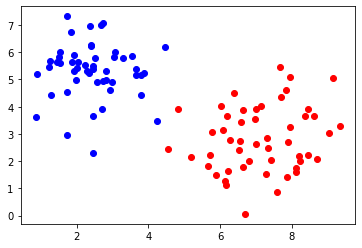

epochs 0: the weight:[[  2.        ]
 [-13.63829809]
 [  4.539207  ]] 



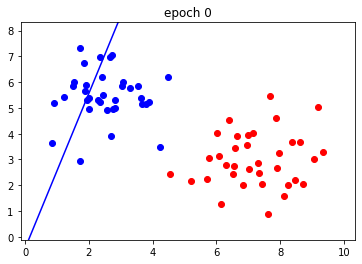

epochs 1: the weight:[[  3.        ]
 [-13.63751197]
 [ 10.35242289]] 



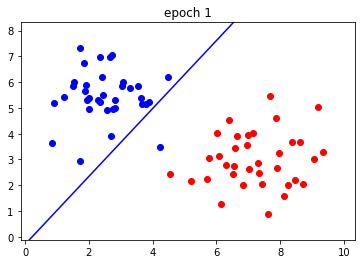

epochs 2: the weight:[[ 4.        ]
 [-9.4095861 ]
 [13.84052482]] 



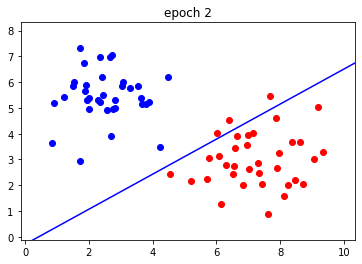

epochs 3: the weight:[[  4.        ]
 [-11.77457662]
 [ 14.95751419]] 



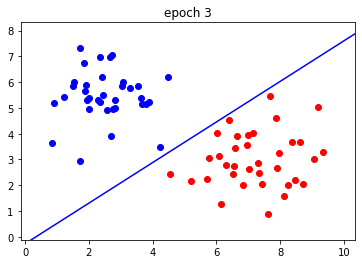

[100, 4, 12, 0]


In [6]:
n = 100
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=123)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=10)
w, in_err, converge_iter = perceptron.seq_fit(plot=True)
print(in_err)

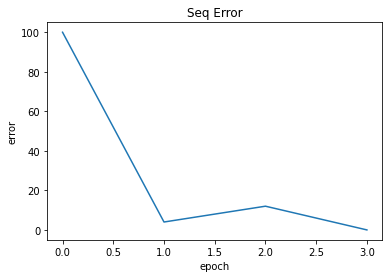

[100, 4, 12, 0]


In [7]:
plt.plot(in_err)
plt.title("Seq Error")
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)

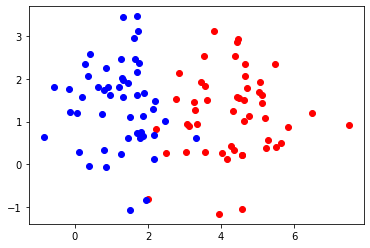

epochs 0: the weight:[[ -2.        ]
 [-12.20272202]
 [ -2.78507212]] 



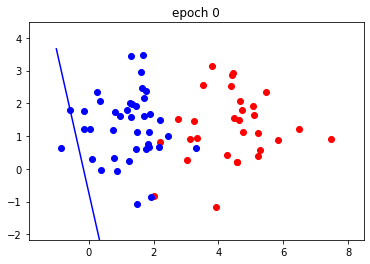

epochs 1: the weight:[[ 1.8       ]
 [-7.20839037]
 [ 2.23770727]] 



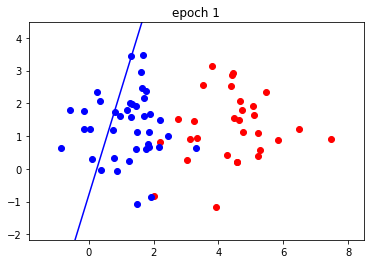

epochs 2: the weight:[[ 4.9       ]
 [-2.39447321]
 [ 6.02430669]] 



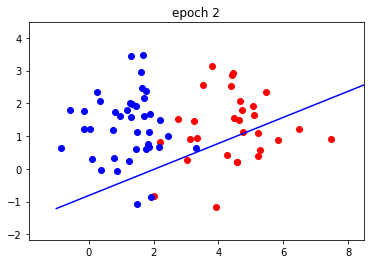

epochs 3: the weight:[[ 3.3       ]
 [-9.46678236]
 [ 2.46824176]] 



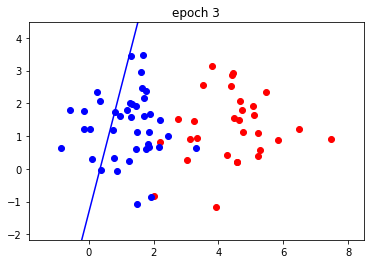

epochs 4: the weight:[[ 6.4       ]
 [-4.6012256 ]
 [ 6.42529126]] 



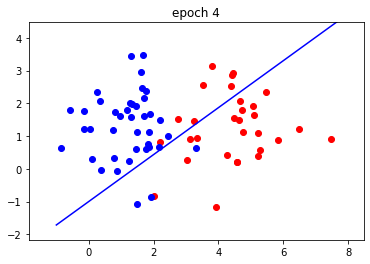

epochs 5: the weight:[[ 5.9       ]
 [-6.80752594]
 [ 4.51038899]] 



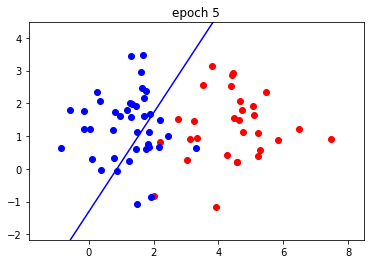

epochs 6: the weight:[[ 7.2       ]
 [-4.36711952]
 [ 5.09871768]] 



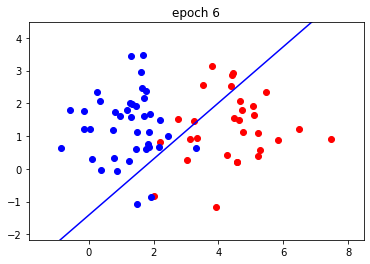

epochs 7: the weight:[[ 6.7       ]
 [-6.57341987]
 [ 3.18381542]] 



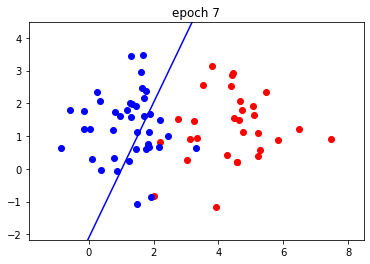

epochs 8: the weight:[[ 8.        ]
 [-4.02962799]
 [ 3.94503264]] 



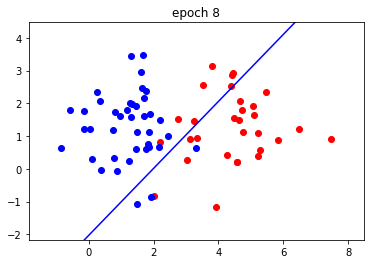

epochs 9: the weight:[[ 7.5       ]
 [-6.23592834]
 [ 2.03013038]] 



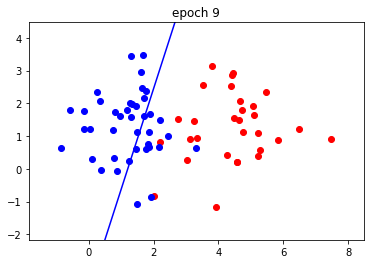

[152, 124, 80, 124, 44, 52, 44, 52, 44, 48]


In [11]:
n = 100
X, y = datasets.make_blobs(n_samples=n, centers=2, n_features=2, center_box=(0, 10), cluster_std=1, random_state=133)
plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'ro')
plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'bo')
plt.show()

y = y*2-1
y = y.reshape(n,1)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3,random_state=420)

perceptron = Perceptron(X_train, Y_train, epochs=10)
w, in_err, converge_iter = perceptron.new_batch_fit(plot=True)
print(in_err)

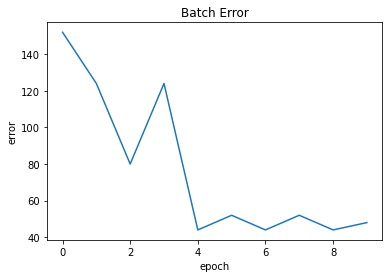

[152, 124, 80, 124, 44, 52, 44, 52, 44, 48]


In [12]:
plt.plot(in_err)
plt.title("Batch Error")
plt.ylabel('error')
plt.xlabel('epoch')
plt.show()
print(in_err)